In [19]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random

In [31]:

# Input image dimensions
img_rows, img_cols = 28, 28

# The number of training samples per batch. 128 is a reasonable number.
batch_size = 128

# Our data set contains 10 digits, so the number of classes is 10
num_classes = 10

# epochs is the number of times the model is trained with the data set, more can be better, up to a point
epochs = 20

# dropout is a common regularization hyperperameter. It helps to avoid overfitting or memorizing the input.
dropout = 0.5

In [32]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Save original test images for display purposes
orig_test = x_test

x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


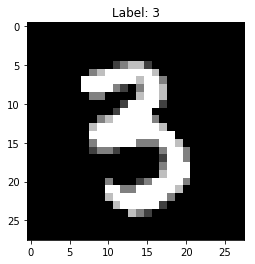

In [33]:
index = random.randrange(1000)
plt.imshow(orig_test[index], cmap='gray')
plt.title('Label: %d' % y_test[index])
plt.show()

In [34]:
# Create three layer model, two hidden layers, one output layer
model = Sequential()
model.add(Flatten(input_shape=(img_rows, img_cols)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(512, activation='relu'))
model.add(Dropout(dropout))
# 10 output units, one for each digit (one hot encoding)
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.3470 - acc: 0.8930 - val_loss: 0.1293 - val_acc: 0.9592
Epoch 2/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.1583 - acc: 0.9527 - val_loss: 0.0920 - val_acc: 0.9703
Epoch 3/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.1282 - acc: 0.9615 - val_loss: 0.0784 - val_acc: 0.9752
Epoch 4/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.1079 - acc: 0.9669 - val_loss: 0.0813 - val_acc: 0.9753
Epoch 5/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.0952 - acc: 0.9700 - val_loss: 0.0674 - val_acc: 0.9792
Epoch 6/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.0874 - acc: 0.9730 - val_loss: 0.0630 - val_acc: 0.9820
Epoch 7/20
60000/60000 [==============================] - 9s 146us/step - 

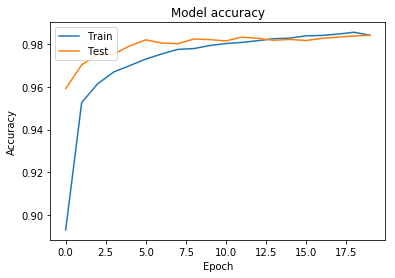

In [35]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['acc'])

# Train model for a given number of epochs
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# Evaluate model against test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [36]:
model_structure = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_structure)
model.save_weights("weights.h5")